In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.stats as ssd

In [2]:
columns = ['Date', 'SPX', 'DAX', 'WIG20', 'EURUSD']

In [3]:
freq_data = pd.read_csv('value_at_risk_frequentist.csv', header=0, names=columns, index_col='Date', parse_dates=['Date'])
bay_data = pd.read_csv('value_at_risk_bayesian.csv', header=0, names=columns, index_col='Date', parse_dates=['Date'])
data = pd.read_csv('study_data.csv', header=0, names=columns, index_col='Date', parse_dates=['Date']).iloc[250:]

In [4]:
#calculate correlations
corr1 = data.corrwith(freq_data, axis=0).round(6)
corr2 = data.corrwith(bay_data, axis=0).round(6)
corr3 = bay_data.corrwith(freq_data, axis=0).round(6)

corrs = pd.DataFrame()
corrs['data_frequentist'] = corr1
corrs['data_bayesian'] = corr2
corrs['frequentist_bayesian'] = corr3
#print(corrs.to_latex())
corrs

,data_frequentist,data_bayesian,frequentist_bayesian
SPX,0.383228,0.382385,0.999494
DAX,0.282482,0.282344,0.999489
WIG20,0.319230,0.318610,0.999601
EURUSD,0.217296,0.217323,0.994777


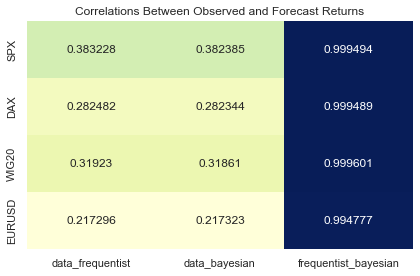

In [5]:
sns.set()
plt.plot(figsize=(10,10))
sns.heatmap(corrs.round(6), annot=True, cbar=False, fmt='.6g', cmap='YlGnBu')
plt.title('Correlations Between Observed and Forecast Returns')
plt.tight_layout()
plt.savefig('forecast_correlations.pdf', bbox_inches='tight')
plt.show()

In [80]:
columns_2 = ['SPX', 'DAX', 'WIG20', 'EURUSD']

#check if forecast sign is convergent
def check_sign_convergence(df):
    check = data.copy()
    for i in columns_2:
        for j in range(len(data)):
            if(np.sign(data[i].iloc[j])==np.sign(df[i].iloc[j])):
                check[i].iloc[j] = True
            else:
                check[i].iloc[j] = False
    print('Number of sign-convergent forecasts:\n',np.sum(check))
    print('Percentage of sign-convergent forecasts:\n', np.sum(check)/len(data)*100)
    print('Average percentage of correctly predicted signs:', round(np.mean(np.sum(check)/len(data)*100),2))

check_sign_convergence(freq_data)
check_sign_convergence(bay_data)

#put errors into a dataframe
signs_df = pd.DataFrame(index=['correctly predicted signs'], columns=columns_2)

Number of sign-convergent forecasts:
 SPX       1185
DAX       1189
WIG20     1149
EURUSD    1137
dtype: object
Percentage of sign-convergent forecasts:
 SPX        57.55221
DAX       57.746479
WIG20     55.803788
EURUSD    55.220981
dtype: object
Average percentage of correctly predicted signs: 56.58
Number of sign-convergent forecasts:
 SPX       1176
DAX       1193
WIG20     1151
EURUSD    1134
dtype: object
Percentage of sign-convergent forecasts:
 SPX       57.115104
DAX       57.940748
WIG20     55.900923
EURUSD    55.075279
dtype: object
Average percentage of correctly predicted signs: 56.51


In [71]:
#calculate MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    return round(np.mean(np.abs((y_true - y_pred) / y_true))*100,2)

#put errors into a dataframe
mape_df = pd.DataFrame(index=['frequentist', 'Bayesian'], columns=columns_2)

#drop rows where return was 0 to avoid dividing by 0
data2 = data.copy()
data2 = data2.drop(data2[data2['SPX']==0].index, axis=0)
data2 = data2.drop(data2[data2['EURUSD']==0].index, axis=0)

for i in columns_2:
    mape_df[i].iloc[0] = mean_absolute_percentage_error(data2[i], freq_data[i])
    mape_df[i].iloc[1] = mean_absolute_percentage_error(data2[i], bay_data[i])

mape_df
#print(mape_df.to_latex())

Frequentist MAPE:


,SPX,DAX,WIG20,EURUSD
frequentist,167.98,197.41,147.18,143.18
Bayesian,167.82,196.52,147.0,141.07


In [89]:
#check where the forward fill in the data was made
data3 = data.copy()
print(data3[data3['SPX']==0])
print(data3[data3['EURUSD']==0])

            SPX       DAX     WIG20    EURUSD
Date                                         
2017-01-10  0.0  0.166845  0.716621 -0.253524
                 SPX       DAX     WIG20  EURUSD
Date                                            
2013-07-30  0.037374  0.145069  0.370302     0.0
2013-09-30 -0.604751 -0.777824 -1.285022     0.0
2013-12-04 -0.130436 -0.901442 -0.405939     0.0
2014-06-24 -0.645610  0.172818 -0.653208     0.0
2014-08-04  0.716333 -0.609230  0.835558     0.0
2014-10-23  1.222833  1.191623  0.194944     0.0
2015-02-13  0.406645  0.399853  0.366251     0.0
2019-09-05  1.292592  0.842509  0.197643     0.0
2022-03-02  1.847098  0.682749  3.837448     0.0
